# Sorting Elements -> Heatmap

# 1. Read dataframe

In [94]:
import os
import pandas as pd

# Set the directory to the parent folder
parent_directory = os.path.expanduser("~/Downloads/1-1_intermetallic-filtered")

# Initialize lists to store data
entries = []
formulas = []

# Loop through the directory and its subdirectories
for root, dirs, files in os.walk(parent_directory):
    for filename in files:
        if filename.endswith(".cif"):
            # Extract the filename without extension
            entry = os.path.splitext(filename)[0]
            file_path = os.path.join(root, filename)

            # Read the file and extract the desired information
            with open(file_path, "r") as file:
                # Keep track of which line we're processing
                line_count = 0
                for line in file:
                    line_count += 1
                    if line_count == 3:  # Check if it's the third line
                        # Split the line by '#'
                        parts = line.split("#")
                        if len(parts) > 2:
                            # Extract the second part, and remove leading/trailing whitespace
                            formula = parts[2].strip()
                            # Break the formula at the first space
                            formula = formula.split(" ")[0]
                            # Append the extracted data to the lists
                            entries.append(entry)
                            formulas.append(formula)
                        else:
                            print(f"Warning: Line '{line}' in file '{filename}' does not contain enough '#' characters.")
                        break  # Break the loop after finding the formula

# Create a DataFrame from the lists
Final = pd.DataFrame({"Entry": entries, "Formula": formulas})
Final

,Entry,Formula
0,1627942,Ni0.5Pd0.5
1,1633076,Rh0.5Pd0.5
2,250004,Rh0.5Pd0.5
3,452070,Th0.5Ce0.5
4,1020480,Pt0.5Pd0.5
...,...,...
1197,1926330,NiSi
1198,1248560,NiSi
1199,451602,PtSi
1200,261217,NiGe


In [20]:
import os
import pandas as pd
import re
# Path to the Excel file
excel_file_path = os.path.join(os.path.expanduser('~'), 'Desktop', 'Final_Example.xlsx')

# Read Excel file
#Final = pd.read_excel(excel_file_path)
#Final

,Entry,Formula
0,1232797,LaNi4.8Sn0.2
1,1963540,Ho3.Ni12Si4
2,1716193,In20Ni9.00Tm10
3,303155,Co1.5Si0.5U
4,1406278,Co52Ge112Nd117
5,1008578,Co52Ge112Sm117
6,1214044,CoGaPr
7,1000501,Ga2NiPr
8,537044,NiPrSi
9,1005456,Ge4Ni4Pr3


# 2. Add Elements & counts

In [95]:
# List of elements
elements = ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K',
            'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb',
            'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs',
            'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta',
            'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th', 'Pa',
            'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr', 'Rf', 'Db', 'Sg', 'Bh', 'Hs', 'Mt',
            'Ds', 'Rg', 'Cn', 'Nh', 'Fl', 'Mc', 'Lv', 'Ts', 'Og']

# Function to parse the formula and extract elements
def parse_formula(formula):
    elements_list = []
    counts_list = []
    current_element = ''
    current_count = ''
    for char in formula:
        if char.isdigit() or char == '.':  # if character is a digit or a period
            current_count += char
        elif char.isupper():  # if character is uppercase letter
            if current_element:
                elements_list.append(current_element)
                counts_list.append(float(current_count) if current_count and current_count != '.' else 1)
                current_count = ''
            current_element = char
        elif char.islower():  # if character is lowercase letter
            current_element += char
    # Add the last element and count
    if current_element:  
        elements_list.append(current_element)
        counts_list.append(float(current_count) if current_count and current_count != '.' else 1)
    return elements_list, counts_list


# Make a copy of the DataFrame to avoid SettingWithCopyWarning
Final_copy = Final.copy()

# Apply the function to each row in the DataFrame
Final_copy[['Elements', 'Counts']] = Final_copy['Formula'].apply(parse_formula).apply(pd.Series)

# Split the lists into separate columns
for i in range(max(map(len, Final_copy['Elements']))):
    Final_copy[f'Element {i+1}'] = Final_copy['Elements'].str[i]
    Final_copy[f'# Element {i+1}'] = Final_copy['Counts'].apply(lambda x: x[i] if len(x) > i else None)

# Drop temporary columns
Final_copy.drop(['Elements', 'Counts'], axis=1, inplace=True)

Final_copy

,Entry,Formula,Element 1,# Element 1,Element 2,# Element 2,Element 3,# Element 3
0,1627942,Ni0.5Pd0.5,Ni,0.5,Pd,0.5,NaN,NaN
1,1633076,Rh0.5Pd0.5,Rh,0.5,Pd,0.5,NaN,NaN
2,250004,Rh0.5Pd0.5,Rh,0.5,Pd,0.5,NaN,NaN
3,452070,Th0.5Ce0.5,Th,0.5,Ce,0.5,NaN,NaN
4,1020480,Pt0.5Pd0.5,Pt,0.5,Pd,0.5,NaN,NaN
...,...,...,...,...,...,...,...,...
1197,1926330,NiSi,Ni,1.0,Si,1.0,NaN,NaN
1198,1248560,NiSi,Ni,1.0,Si,1.0,NaN,NaN
1199,451602,PtSi,Pt,1.0,Si,1.0,NaN,NaN
1200,261217,NiGe,Ni,1.0,Ge,1.0,NaN,NaN


# 3. Find errors

In [101]:
# Define a list of symbols that are not elements
invalid_symbols = [char for char in set(''.join(elements)) if char.isalpha() and char.upper() not in elements and char != '.']

# Define a DataFrame with invalid formulas
invalid_formulas = Final_copy.copy()

# Function to parse the formula and extract elements
def parse_formula(formula):
    elements_list = []
    counts_list = []
    error = None  # Initialize variable to store the error message
    current_element = ''
    current_count = ''
    for i, char in enumerate(formula, start=1):
        if char.isdigit():  # if character is a number
            current_count += char
        elif char.isupper():  # if character is uppercase letter
            if current_element:
                if current_element.capitalize() in elements:  # Check both capital and lowercase versions
                    elements_list.append(current_element.capitalize())
                    counts_list.append(int(current_count) if current_count else 1)
                    current_count = ''
                    current_element = char
                else:
                    error = f"'{current_element}' is not a valid element"
                    break
            else:
                current_element = char
        elif char.islower():  # if character is lowercase letter
            current_element += char
        elif char in invalid_symbols:  # if character is an invalid symbol
            error = f"'{char}' is not a valid symbol"
            break
        elif char == '.':  # Skip the '.' character
            continue
        else:  # if character is not recognized
            error = f"'{char}' is not recognized"
            break
    if current_element.capitalize() in elements:  # Check both capital and lowercase versions
        elements_list.append(current_element.capitalize())
        counts_list.append(int(current_count) if current_count else 1)
    else:
        error = f"'{current_element}' is not a valid element"
    return elements_list, counts_list, error

# Apply the function to each row in the DataFrame
parsed_data = invalid_formulas['Formula'].apply(parse_formula).apply(pd.Series)
invalid_formulas[['Elements', 'Counts', 'Error']] = parsed_data.iloc[:, :3]
invalid_formulas


,Entry,Formula,Element 1,# Element 1,Element 2,# Element 2,Element 3,# Element 3,Elements,Counts,Error
0,1627942,Ni0.5Pd0.5,Ni,0.5,Pd,0.5,NaN,NaN,"[Ni, Pd]","[5, 5]",None
1,1633076,Rh0.5Pd0.5,Rh,0.5,Pd,0.5,NaN,NaN,"[Rh, Pd]","[5, 5]",None
2,250004,Rh0.5Pd0.5,Rh,0.5,Pd,0.5,NaN,NaN,"[Rh, Pd]","[5, 5]",None
3,452070,Th0.5Ce0.5,Th,0.5,Ce,0.5,NaN,NaN,"[Th, Ce]","[5, 5]",None
4,1020480,Pt0.5Pd0.5,Pt,0.5,Pd,0.5,NaN,NaN,"[Pt, Pd]","[5, 5]",None
...,...,...,...,...,...,...,...,...,...,...,...
1197,1926330,NiSi,Ni,1.0,Si,1.0,NaN,NaN,"[Ni, Si]","[1, 1]",None
1198,1248560,NiSi,Ni,1.0,Si,1.0,NaN,NaN,"[Ni, Si]","[1, 1]",None
1199,451602,PtSi,Pt,1.0,Si,1.0,NaN,NaN,"[Pt, Si]","[1, 1]",None
1200,261217,NiGe,Ni,1.0,Ge,1.0,NaN,NaN,"[Ni, Ge]","[1, 1]",None


# 4. Filter out entries without NaN in Error_Entry, give total elements

In [103]:
# Filter the invalid_formulas DataFrame to select rows where the "Error" column is None
filtered = invalid_formulas[invalid_formulas['Error'].isnull()]
filtered

,Entry,Formula,Element 1,# Element 1,Element 2,# Element 2,Element 3,# Element 3,Elements,Counts,Error
0,1627942,Ni0.5Pd0.5,Ni,0.5,Pd,0.5,NaN,NaN,"[Ni, Pd]","[5, 5]",None
1,1633076,Rh0.5Pd0.5,Rh,0.5,Pd,0.5,NaN,NaN,"[Rh, Pd]","[5, 5]",None
2,250004,Rh0.5Pd0.5,Rh,0.5,Pd,0.5,NaN,NaN,"[Rh, Pd]","[5, 5]",None
3,452070,Th0.5Ce0.5,Th,0.5,Ce,0.5,NaN,NaN,"[Th, Ce]","[5, 5]",None
4,1020480,Pt0.5Pd0.5,Pt,0.5,Pd,0.5,NaN,NaN,"[Pt, Pd]","[5, 5]",None
...,...,...,...,...,...,...,...,...,...,...,...
1197,1926330,NiSi,Ni,1.0,Si,1.0,NaN,NaN,"[Ni, Si]","[1, 1]",None
1198,1248560,NiSi,Ni,1.0,Si,1.0,NaN,NaN,"[Ni, Si]","[1, 1]",None
1199,451602,PtSi,Pt,1.0,Si,1.0,NaN,NaN,"[Pt, Si]","[1, 1]",None
1200,261217,NiGe,Ni,1.0,Ge,1.0,NaN,NaN,"[Ni, Ge]","[1, 1]",None


# 5. Classify as unary, binary, ternary or quaternary

In [106]:
# Create a new DataFrame with a copy of the filtered data
filtered_copy = filtered.copy()

# Create a new column called "System" in the copied DataFrame and set initial values to None
filtered_copy['System'] = None

# Loop through the number of elements in column "Elements"
for index, row in filtered_copy.iterrows():
    num_elements = len(row['Elements'])
    if num_elements == 1:
        filtered_copy.loc[index, 'System'] = 'Unary'
    elif num_elements == 2:
        filtered_copy.loc[index, 'System'] = 'Binary'
    elif num_elements == 3:
        filtered_copy.loc[index, 'System'] = 'Ternary'
    elif num_elements == 4:
        filtered_copy.loc[index, 'System'] = 'Quaternary'

filtered_copy

,Entry,Formula,Element 1,# Element 1,Element 2,# Element 2,Element 3,# Element 3,Elements,Counts,Error,System
0,1627942,Ni0.5Pd0.5,Ni,0.5,Pd,0.5,NaN,NaN,"[Ni, Pd]","[5, 5]",None,Binary
1,1633076,Rh0.5Pd0.5,Rh,0.5,Pd,0.5,NaN,NaN,"[Rh, Pd]","[5, 5]",None,Binary
2,250004,Rh0.5Pd0.5,Rh,0.5,Pd,0.5,NaN,NaN,"[Rh, Pd]","[5, 5]",None,Binary
3,452070,Th0.5Ce0.5,Th,0.5,Ce,0.5,NaN,NaN,"[Th, Ce]","[5, 5]",None,Binary
4,1020480,Pt0.5Pd0.5,Pt,0.5,Pd,0.5,NaN,NaN,"[Pt, Pd]","[5, 5]",None,Binary
...,...,...,...,...,...,...,...,...,...,...,...,...
1197,1926330,NiSi,Ni,1.0,Si,1.0,NaN,NaN,"[Ni, Si]","[1, 1]",None,Binary
1198,1248560,NiSi,Ni,1.0,Si,1.0,NaN,NaN,"[Ni, Si]","[1, 1]",None,Binary
1199,451602,PtSi,Pt,1.0,Si,1.0,NaN,NaN,"[Pt, Si]","[1, 1]",None,Binary
1200,261217,NiGe,Ni,1.0,Ge,1.0,NaN,NaN,"[Ni, Ge]","[1, 1]",None,Binary


# 6. Give total elements

In [107]:
# Initialize an empty dictionary to store element counts
element_counts = {}

# Iterate through the DataFrame columns in pairs
for i in range(1, (len(filtered.columns) // 2) + 1):
    element_col = f'Element {i}'
    count_col = f'# Element {i}'
    
    # Check if the columns exist in the DataFrame
    if element_col not in filtered_copy.columns or count_col not in filtered_copy.columns:
        continue
    
    # Iterate through rows to aggregate element counts
    for index, row in filtered_copy.iterrows():
        element = row[element_col]
        count = row[count_col]
        
        # Add the count to the element's total count
        if pd.notnull(element) and pd.notnull(count):
            if element in element_counts:
                element_counts[element] += count
            else:
                element_counts[element] = count

# Convert the dictionary to a DataFrame
results = pd.DataFrame(list(element_counts.items()), columns=['Element', '# Element'])

results

,Element,# Element
0,Ni,187.660
1,Rh,77.500
2,Th,24.599
3,Pt,125.650
4,Ru,24.640
5,Co,87.460
6,Fe,200.910
7,Ir,34.030
8,Ce,67.610
9,Os,7.650


# 7. Display heatmap

In [108]:
def dataframe_to_dict(results, elements):
    """
    Convert DataFrame to dictionary with Element as keys and # Element as values,
    including elements with counts of 0.

    Args:
    results (DataFrame): DataFrame with 'Element' and '# Element' columns.
    elements (list): List of all elements to include in the dictionary.

    Returns:
    dict: Dictionary with Element as keys and # Element as values.
    """
    # Initialize an empty dictionary with all elements and counts set to 0
    d = {element: 0 for element in elements}

    # Iterate through DataFrame rows and update the counts
    for index, row in results.iterrows():
        d[row['Element']] = row['# Element']

    return d

# Convert DataFrame 'results' to dictionary using the function
d = dataframe_to_dict(results, elements)

# Print the resulting dictionary
print(d)

{'H': 0, 'He': 0, 'Li': 0, 'Be': 0, 'B': 0, 'C': 0, 'N': 0, 'O': 0, 'F': 0, 'Ne': 0, 'Na': 0, 'Mg': 0, 'Al': 0, 'Si': 257.13, 'P': 0, 'S': 0, 'Cl': 0, 'Ar': 0, 'K': 0, 'Ca': 0, 'Sc': 29.5, 'Ti': 0, 'V': 0, 'Cr': 0, 'Mn': 0, 'Fe': 200.91, 'Co': 87.46000000000001, 'Ni': 187.66, 'Cu': 0, 'Zn': 0, 'Ga': 64.0, 'Ge': 52.870000000000005, 'As': 0, 'Se': 0, 'Br': 0, 'Kr': 0, 'Rb': 0, 'Sr': 0, 'Y': 36.870000000000005, 'Zr': 0, 'Nb': 0, 'Mo': 0, 'Tc': 0, 'Ru': 24.64, 'Rh': 77.5, 'Pd': 56.730000000000004, 'Ag': 1.0, 'Cd': 0, 'In': 94.0, 'Sn': 52.5, 'Sb': 392.18, 'Te': 0, 'I': 0, 'Xe': 0, 'Cs': 0, 'Ba': 0, 'La': 8.5, 'Ce': 67.61, 'Pr': 25.150000000000002, 'Nd': 32.78, 'Pm': 0, 'Sm': 27.3, 'Eu': 0, 'Gd': 50.599999999999994, 'Tb': 24.5, 'Dy': 36.5, 'Ho': 50.5, 'Er': 50.071, 'Tm': 25.0, 'Yb': 27.0, 'Lu': 20.0, 'Hf': 0, 'Ta': 0, 'W': 0, 'Re': 0, 'Os': 7.65, 'Ir': 34.03, 'Pt': 125.65, 'Au': 0, 'Hg': 0, 'Tl': 0, 'Pb': 0, 'Bi': 0, 'Po': 0, 'At': 0, 'Rn': 0, 'Fr': 0, 'Ra': 0, 'Ac': 0, 'Th': 24.599, 'Pa': 0

In [109]:
import os

def element_prevalence(formulae,
                       name='example',
                       save_dir='Desktop',
                       log_scale=True,
                       ptable_fig=True):
    desktop_path = os.path.expanduser("~/Desktop")  # Get the path to the desktop
    ptable_path = os.path.join(desktop_path, 'ptable.csv')  # Create the full path to ptable.csv
    
    ptable = pd.read_csv(ptable_path)

    ptable.index = ptable['symbol'].values
    elem_tracker = ptable['count']
    n_row = ptable['row'].max()
    n_column = ptable['column'].max()
    
    elem_tracker = pd.Series(data=d, index=['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na',
                   'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc',
                   'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga',
                   'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb',
                   'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb',
                   'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm',
                   'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu',
                   'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl',
                   'Pb', 'Bi', 'Po', 'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th', 'Pa',
                   'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md',
                   'No', 'Lr', 'Rf', 'Db', 'Sg', 'Bh', 'Hs', 'Mt', 'Ds', 'Rg',
                   'Cn', 'Nh', 'Fl', 'Mc', 'Lv', 'Ts', 'Og']) 

    
    
    if ptable_fig:
        fig, ax = plt.subplots(figsize=(n_column, n_row))
        rows = ptable['row']
        columns = ptable['column']
        symbols = ptable['symbol']
#         print(symbols)
        rw = 1.0 # rectangle width (rw)
        rh = 1.0  # rectangle height (rh)
        for row, column, symbol in zip(rows, columns, symbols):
            row = ptable['row'].max() - row
            cmap = cm.GnBu                                           #Color
            count_min = elem_tracker.min()
            count_max = elem_tracker.max()
            count_max = count_max + 24
 
            norm = Normalize(vmin=count_min, vmax=count_max)
            count = elem_tracker[symbol]
 
            if log_scale:
                norm = Normalize(vmin=np.log(1), vmax=np.log(count_max))
                if count != 0:
                    count = np.log(count)
            color = cmap(norm(count))
            if count == 0:
                color =   'white'
            if count > 0 and count <= 10 :
                color = 'lightyellow'    
            rect = patches.Rectangle((column, row), rw, rh,
                                     linewidth=2,
                                     edgecolor='black',
                                     facecolor=color,
                                     alpha=1)

            
            plt.text(column+rw/2, row+rw/2, symbol,
                     horizontalalignment='center',
                     verticalalignment='center',
                     fontsize=20,
                     fontweight='semibold', color='black') 
            ax.add_patch(rect)

        granularity = 20
        for i in range(granularity):
            value = int(round((i) * count_max/(granularity-1)))
            if log_scale:
                if value != 0:
                    value = np.log(value)
            color = cmap(norm(value))
            if value == 0:
                color = 'white' #white
            if value > 0 and value <= 40 :
                color = 'lightyellow'
            length = 9
            x_offset = 3.5
            y_offset = 9.5 #7.8
            x_loc = i/(granularity) * length + x_offset
            width = length / granularity
            height = 0.35
            rect = patches.Rectangle((x_loc, y_offset), width, height,
                                     linewidth=1.5,
                                     edgecolor='gray',
                                     facecolor=color,
                                     alpha=1)

            if i in [0, 4, 9, 14, 19]:
                text = f'{value:0.0f}'
#                 if i == 0:
#                     text = 0
#                 if i == 4:   #print(text)
#                     text = nearest_100(i)
#                 if i == 9:   #print(text)
#                     text = 400
#                 if i == 14:   #print(text)
#                     text = 600
                if log_scale:
                    text = f'{np.exp(value):0.1e}'.replace('+', '')
                plt.text(x_loc+width/2, y_offset-0.4, text,
                         horizontalalignment='center',
                         verticalalignment='center',
                         fontweight='semibold',
                         fontsize=20, color='k')

            ax.add_patch(rect)

        plt.text(x_offset+length/2, y_offset+0.7,
                 'log(Element Count)' if log_scale else 'Element Count',
                 horizontalalignment='center',
                 verticalalignment='center',
                 fontweight='semibold',
                 fontsize=20, color='k')

        ax.set_ylim(-0.15, n_row+.1)
        ax.set_xlim(0.15, n_column+4.5)

        # fig.patch.set_visible(False)
        ax.axis('off')

        if save_dir is not None:
            fig_name = f'{save_dir}_ptable.png'
            os.makedirs(save_dir, exist_ok=True)
            plt.savefig(fig_name, format='png', bbox_inches='tight', dpi=600)
        plt.draw()
        plt.pause(0.001)
        plt.close()
        
        
def _element_composition(formula):
    elmap = parse_formula(formula)
    elamt = {}
    natoms = 0
    for k, v in elmap.items():
#         print(v)
        if abs(v) >= 0:   # 0.05
            elamt[k] = v
            natoms += abs(v)
#     print(elamt)
    return elamt

def parse_formula(formula):
    """
    Args:
        formula (str): A string formula, e.g. Fe2O3, Li3Fe2(PO4)3
    Returns:
        Composition with that formula.
    Notes:
        In the case of Metallofullerene formula (e.g. Y3N@C80),
        the @ mark will be dropped and passed to parser.
    """
    # for Metallofullerene like "Y3N@C80"
    formula = formula.replace("@", "")
    formula = formula.replace('[', '(')
    formula = formula.replace(']', ')')

    m = re.search(r"\(([^\(\)]+)\)\s*([\.\d]*)", formula)
#     print(m)
    if m:
        factor = 1
        if m.group(2) != "":
            factor = float(m.group(2))
        unit_sym_dict = get_sym_dict(m.group(1), factor)
        expanded_sym = "".join(["{}{}".format(el, amt)
                                for el, amt in unit_sym_dict.items()])
        expanded_formula = formula.replace(m.group(), expanded_sym)
        return parse_formula(expanded_formula)
    return get_sym_dict(formula, 1)

def get_sym_dict(f, factor):
    sym_dict = collections.defaultdict(float)
    for m in re.finditer(r"([A-Z][a-z]*)\s*([-*\.\d]*)", f):
        el = m.group(1)
        amt = 1
        if m.group(2).strip() != "":
            amt = float(m.group(2))
        sym_dict[el] += amt * factor
        f = f.replace(m.group(), "", 1)
    if f.strip():
        raise CompositionError("{} is an invalid formula!".format(f))
    return sym_dict

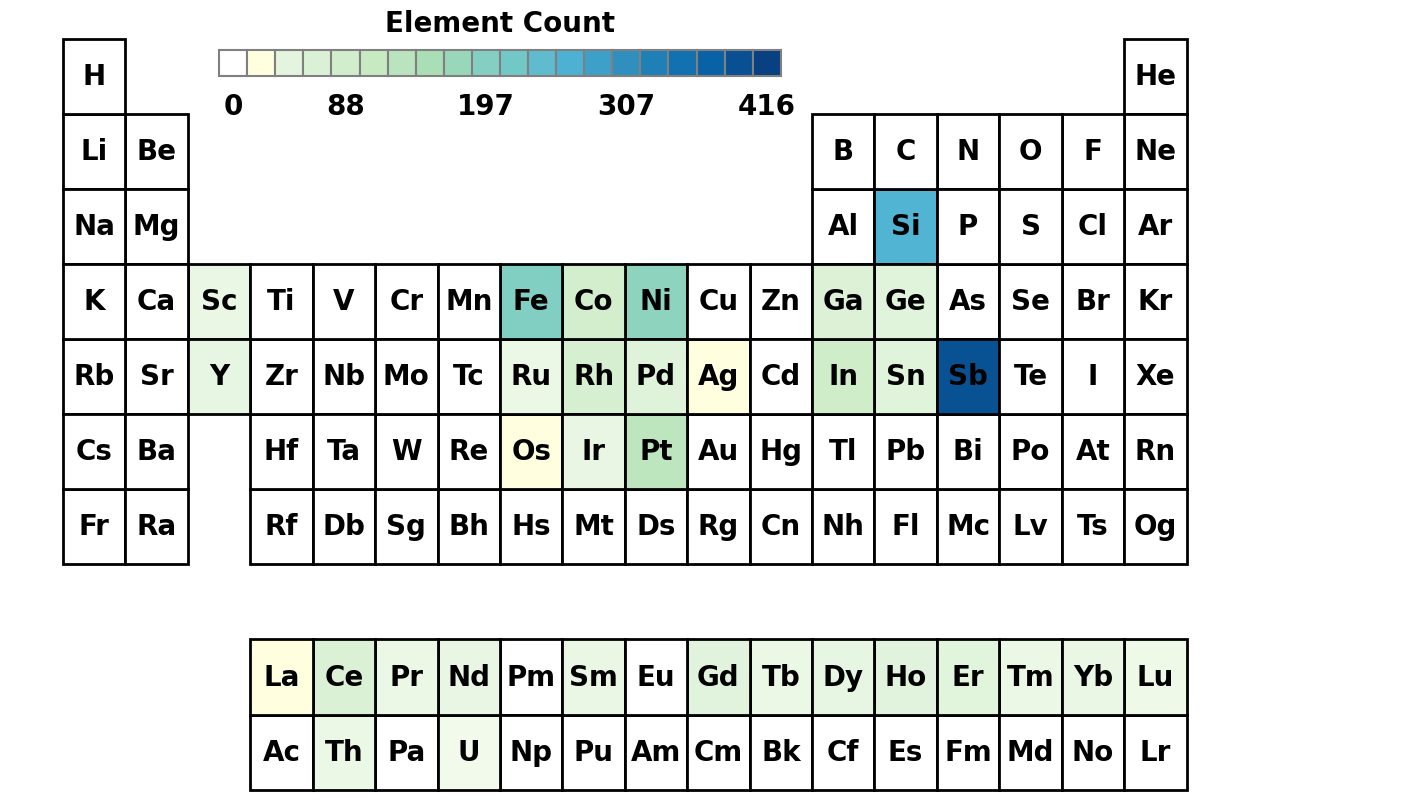

In [110]:
# Visualize element prevalence
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cm as cm

from matplotlib.ticker import AutoMinorLocator
from matplotlib.colors import Normalize

# Convert dictionary keys (elements) to a list
formula = list(d.keys())

# Call the function with the list of elements
element_prevalence(formula,
                   name=f'/ptable1',
                   log_scale=False)

plt.rcParams.update({'font.size': 12})